In [18]:
!pip install dask["complete"]
import dask

  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached msgpack-1.0.8-cp310-cp310-win_amd64.whl.metadata (9.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/99.8 kB ? eta -:--:--
   ------------------------------------ --- 92.2/99.8 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 99.8/99.8 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/25.9 MB 5.3 MB/s eta 0:00:05
    --------------------------------------- 0.4/25.9 MB 4.6 MB/s eta 0:00:06
   - -------------------------------------- 0.8/25.9 MB 5.7 MB/s eta 0:00:05
   - -------------------------------------- 1.1/25.9 MB 6.0 MB/s eta 0:00:05
   -- ------------------------------------- 1.5/25.9 MB 6.1 MB/s eta 0:00:05
   -- ------------------------------------- 1.7/25.9 MB 6.2 MB/s eta 0:00:04
   --- ----------------------------------

In [19]:
from time import sleep
def inc(x):
    sleep(1)
    return x + 1
def add (x, y):
    sleep(1)
    return x + y

In [20]:
%%time
x = inc(111)
y = inc(222)
z = add(x, y)

CPU times: total: 0 ns
Wall time: 3.07 s


In [21]:
from dask import delayed

In [22]:
@delayed
def inc(x):
    sleep(1)
    return x + 1
@delayed
def add(x, y):
    sleep(1)
    return x + y

In [23]:
%%time
x = delayed(inc)(5)
y = delayed(inc)(10)
z = delayed(add)(x, y)

CPU times: total: 0 ns
Wall time: 0 ns


In [24]:
#pip install graphviz ipycytoscape

In [10]:
# note for windows users 
# if you got error like this `failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH` then please install graphviz this library, to install that use scoop package manager

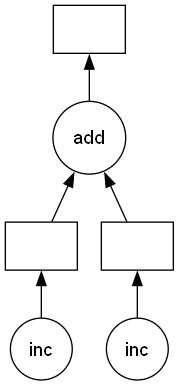

In [25]:
z.visualize()

In [26]:
%%time
z.compute()

CPU times: total: 453 ms
Wall time: 4.07 s


17

In [27]:
data = []
for i in range(1, 9):
    data.append(i)
data

[1, 2, 3, 4, 5, 6, 7, 8]

In [28]:
%%time

results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

CPU times: total: 0 ns
Wall time: 1 ms


In [29]:
%%time
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)

total.compute()

CPU times: total: 0 ns
Wall time: 2.03 s


44

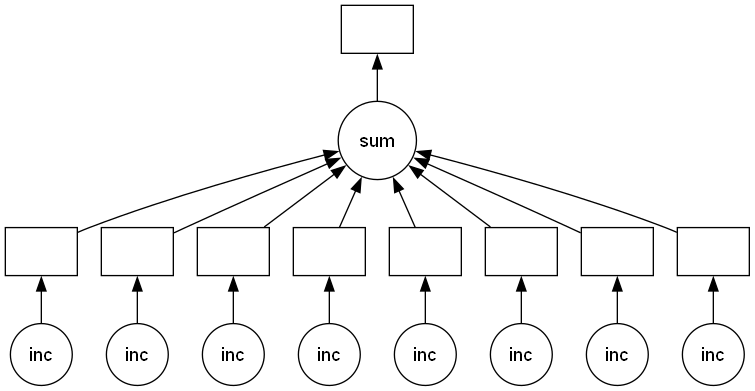

In [30]:
total.visualize()

In [15]:
import urllib

print("- Downloading NYC Flights dataset... ", end='', flush=True)
url = "https://storage.googleapis.com/dask-tutorial-data/nycflights.tar.gz"
filename, headers = urllib.request.urlretrieve(url, 'nycflights.tar.gz')
print("Done!", flush=True)

- Downloading NYC Flights dataset... 

KeyboardInterrupt: 

In [ ]:
import tarfile

# extract the .csv files from the tar file
with tarfile.open(filename, mode='r:gz') as flights:
            flights.extractall('data/')

In [31]:
import os
import dask.dataframe as dd

df = dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),
                 parse_dates={'Date': [0, 1, 2]})
df

d:\Project\Dask-Practise\dask-practise\lib\site-packages\dask\dataframe\io\csv.py:640: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)


ImportError: Dask diagnostics requirements are not installed.

Please either conda or pip install as follows:

  conda install dask                     # either conda install
  python -m pip install "dask[diagnostics]" --upgrade  # or python -m pip install

Dask DataFrame Structure:
                          Date DayOfWeek  DepTime CRSDepTime  ArrTime CRSArrTime UniqueCarrier FlightNum  TailNum ActualElapsedTime CRSElapsedTime  AirTime ArrDelay DepDelay  Origin    Dest Distance   TaxiIn  TaxiOut Cancelled Diverted
npartitions=10                                                                                                                                                                                                                             
                datetime64[ns]     int64  float64      int64  float64      int64        string     int64  float64           float64          int64  float64  float64  float64  string  string  float64  float64  float64     int64    int64
                           ...       ...      ...        ...      ...        ...           ...       ...      ...               ...            ...      ...      ...      ...     ...     ...      ...      ...      ...       ...      ...
...                        ...

In [32]:
df.head()

d:\Project\Dask-Practise\dask-practise\lib\site-packages\dask\dataframe\io\csv.py:640: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)
d:\Project\Dask-Practise\dask-practise\lib\site-packages\dask\dataframe\io\csv.py:195: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [34]:
df.tail()

d:\Project\Dask-Practise\dask-practise\lib\site-packages\dask\dataframe\io\csv.py:195: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)


ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------+---------+----------+
| Column         | Found   | Expected |
+----------------+---------+----------+
| CRSElapsedTime | float64 | int64    |
| TailNum        | object  | float64  |
+----------------+---------+----------+

The following columns also raised exceptions on conversion:

- TailNum
  ValueError("could not convert string to float: 'N54711'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CRSElapsedTime': 'float64',
       'TailNum': 'object'}

to the call to `read_csv`/`read_table`.

In [3]:
# for coloumns with mixed dtypes we have to infer the correct type
df = dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

NameError: name 'dd' is not defined

In [36]:
df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999,12,27,1,1645.0,1645,1830.0,1901,UA,1753,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999,12,28,2,1726.0,1645,1928.0,1901,UA,1753,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999,12,29,3,1646.0,1645,1846.0,1901,UA,1753,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999,12,30,4,1651.0,1645,1908.0,1901,UA,1753,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999,12,31,5,1642.0,1645,1851.0,1901,UA,1753,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


In [37]:
%time df.DepDelay.max().compute()

CPU times: total: 2.31 s
Wall time: 3.22 s


1435.0

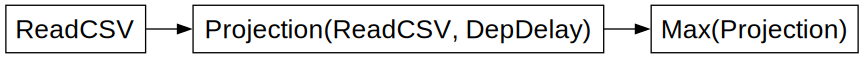

In [38]:
df.DepDelay.max().visualize(rankdir="LR", size="12, 12!")

In [39]:
df_train = df[['CRSDepTime',  'CRSArrTime', 'Cancelled']]

In [40]:
df_train.shape

(<dask_expr.expr.Scalar: expr=(ReadCSV(2caf8af)[['CRSDepTime', 'CRSArrTime', 'Cancelled']]).size() // 3, dtype=int32>,
 3)

In [2]:
df_train.isnull().sum().compute()

NameError: name 'df_train' is not defined

In [50]:
#!pip install keras tensorflow
from keras.models import Sequential
from keras.layers import Dense

# Build a simple Keras Model
batch = df.sample(frac=0.01)
X = batch.iloc[:, :-1]
y = batch.iloc[:, -1]

model = Sequential()
model.add(Dense(20, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd',)

In [1]:
batch = df.sample(frac=0.01)
X = batch.iloc[:, :-1]
y = batch.iloc[:, -1]

X.shape[1]

NameError: name 'df' is not defined

In [51]:
def dask_data_generator(df, fraction=0.01):
  while True:
    batch = df.sample(frac=fraction)
    X = batch.iloc[:, :-1]
    y = batch.iloc[:, -1]
    yield (X.compute(), y.compute())

In [52]:
model.fit_generator(generator=dask_data_generator(df_train),
                    steps_per_epoch=10)

C:\Users\khano\AppData\Local\Temp\ipykernel_20724\697823900.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=dask_data_generator(df_train),


211725        1837        2021
217198        1635        1900
263738         815        1124
50820         1645        1957
201454        2240        2349
...            ...         ...
102065         635         742
264303        1700        1930
6064           815        1129
150881         600         804
81886         1030        1249

[26119 rows x 2 columns]. Consider rewriting this model with the Functional API.


AttributeError: Exception encountered when calling layer "sequential_3" "                 f"(type Sequential).

'tuple' object has no attribute 'rank'

Call arguments received by layer "sequential_3" "                 f"(type Sequential):
  • inputs=        CRSDepTime  CRSArrTime
211725        1837        2021
217198        1635        1900
263738         815        1124
50820         1645        1957
201454        2240        2349
...            ...         ...
102065         635         742
264303        1700        1930
6064           815        1129
150881         600         804
81886         1030        1249

[26119 rows x 2 columns]
  • training=False
  • mask=None